# Задача: найти формулу успешного фильма с помощью кластеризации!
Есть датасет с информацией о самых разных фильмах. Задачи следующие:
 
Я хочу помочь Голливуду создавать более прибыльные проекты. Сделаю я это следующим образом.

- Определю, что такое успешный фильм

- У фильмов в датасете перечислен ряд жанров, к которым они относятся. С помощью кластеризации я выясню, какое сочетание жанров позволяет сделать успешный фильм


## Что получилось?

### Что такое успешный фильм?  
В ходе анализа роста прибыли/бюджетов/количества снятых фильмов по годам было принято решение отобрать фильмы с 1990 по 2016 год. Успешными фильмами считаются фильмы, снятые в этот период и принёсшие прибыль выше, чем 85% фильмов своего года.

### По каким фичам шла кластеризация?

Жанры(кроме тех, в которых было мало фильмов: ни бы просто усложнили кластеризацию), некоторые keyword: based on novel, superhero. Таким образом, кластеризация происходила по категориальным данным

### Какие кластеры получились?

Было применено несколько способов кластеризации. K-means ничего не дал, Иерархический кластерный анализ проводился с 6 и 9 кластерами. Был выбран вариант с 6, так как он был более интерпретируемый.

Вклад жанра в кластер оценивался по частоте встречаемости жанра в кластере. По уровню средней можно выделить **ключевые жанры** и **элементы**. Можно будет смело рассказывать голливудским режиссёрам, чего должно быть больше, а чего меньше, чтобы фильм принёс хорошие деньги. Но что отнести к ключевому жанру, а что к элементу? Я посчитала, что можно включить в ключевой жанр максимальный по среднему в кластере, и уже относительно него рассчитывать границы. То, что будет в пределах половины от него, будет также считаться ключевым. То, что выйдет за половину, но будет в пределах 3/4 от жанра, будет считаться элементом

- Нулевой кластер.

Ключевые жанры: Драма. Элементы: триллер, романтика, экшн. 

Пример результатов: 'King Kong', 'Titanic', 'World War Z', 'The Great Gatsby', 'A Christmas Carol', 'Snow White and the Huntsman'

- Первый кластер.

Ключевые жанры: экшн-приключение-фэнтези. Элементы: комедия.  

Пример результатов: 'Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'Spider-Man 3', 'Batman v Superman: Dawn of Justice', 'Superman Returns'

- Второй кластер.

Ключевые жанры: семейное кино-анимация-комедия-приключение. Элементы: фентези. 

'Tangled', 'Harry Potter and the Half-Blood Prince', 'The Chronicles of Narnia: Prince Caspian', 'Alice in Wonderland', 'Monsters University', 'Oz: The Great and Powerful', 'Cars 2', 'Toy Story 3'

- Третий кластер.

Ключевые жанры: Комедия. Элементы: романтика, драма. 

'Fun with Dick and Jane', "Gulliver's Travels", 'The Green Hornet', 'Little Fockers', 'The Wolf of Wall Street', '102 Dalmatians', 'The Holiday', "It's Complicated"

- Четвёртый кластер. 

Ключевые жанры: триллер-экшн. Элементы: криминал-приключение. Джон Уик, фильмы про Бонда, фильмы про Бэтмена Нолана

'The Dark Knight Rises', 'Skyfall', 'Rush Hour 3', 'The Dark Knight', 'The Fast and the Furious', 'Batman Begins'

- Пятый кластер. 

Ключевые жанры: сайнсфикшн-экшн-приключение. Элементы: триллер. 

'John Carter', 'Avengers: Age of Ultron', 'The Avengers', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Iron Man 3', 'X-Men: The Last Stand'

Как видно из фильмов, кластеризация далеко не идеальна: в одном кластере могут находиться довольно разные фильмы(World War и Gatsby). Хотя первый, четвёртый и пятый кластер дают вполне ожидаемые результаты. Прибыль с этих кластеров согласуется с результатми по прибыли для отдельных жанров.

### Так что мы в итоге советуем голливуду по результатам кластеризации? 

Больше всего прибыли можно получить с сайфай экшна с элементами трилера, приключенческого экшн-фентези с элементами комедии, семейного комедийного и приключенческого мультика с элементами фентези. При этом на мультик можно потратить меньше денег, чем на первые два. 
Триллер экшн с элементами криминала и приключения обойдётся во столько же, сколько и семейный мультик, но принесёт меньше денег. Драма с элементами романтики, трилера и экшна может выйти примерно такой же по прибыли, но обойдётся в меньшую стоимость. Комедия с элементами романтики и драмы обойдётся ещё дешевле.

А ещё комедия с элементами романтики даст больше прибыли по отношению к затратам(примерно 19/100, тогда как остальные кластеры варьируются от 23/100 до 27/100)


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering


import ast
from collections import Counter
from itertools import chain

In [2]:
sns.set (
    font_scale =1.5,
    style = 'whitegrid',
    rc= {'figure.figsize': (30,7)}
)

In [3]:
movie_df = pd.read_csv('C:/Users/cbata/test_cases/moviedb_linear_reg_and_clustering/tmdb_5000_movies.csv')

## Общий обзор данных: пропуски, содержимое, ошибки

In [4]:
movie_df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


Помимо проблем с записью некоторых колонок(жанр), которые исправлю позже, сразу следует избавиться от колонок, которые вряд ли пригодятся. 

In [5]:
movie_df = movie_df.drop(columns =['homepage','overview', 'production_companies', 'spoken_languages', 'original_title', 'status', 'tagline'])

Здесь всё на месте, удалять ничего не нужно

In [6]:
def get_info(df): #функция для получения shape, types и количества NAN в колонках
    shape = df.shape
    types = df.dtypes
    isna_sum = df.isna().sum()
    dict = {"shape": shape, "types":types, "NAN" : isna_sum}
    return dict

In [7]:
get_info(movie_df)

{'shape': (4803, 13),
 'types': budget                    int64
 genres                   object
 id                        int64
 keywords                 object
 original_language        object
 popularity              float64
 production_countries     object
 release_date             object
 revenue                   int64
 runtime                 float64
 title                    object
 vote_average            float64
 vote_count                int64
 dtype: object,
 'NAN': budget                  0
 genres                  0
 id                      0
 keywords                0
 original_language       0
 popularity              0
 production_countries    0
 release_date            1
 revenue                 0
 runtime                 2
 title                   0
 vote_average            0
 vote_count              0
 dtype: int64}

У release_date сбита дата, меняем тип на dt. А ещё следует сразу добавить колонку с годом - так будет удобнее.

In [8]:
movie_df.release_date = pd.to_datetime(movie_df.release_date)

In [9]:
movie_df['year'] = movie_df.release_date.dt.year

Некоторые колонки сейчас записаны списка из словарей, например, жанр. Это надо исправить!

In [10]:
movie_df.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [11]:
#функция для поиска нужных слов
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [12]:
movie_df['genres'] = movie_df['genres'].apply(convert)

In [13]:
movie_df['keywords'] = movie_df['keywords'].apply(convert)

In [14]:
movie_df['production_countries'] = movie_df['production_countries'].apply(convert)

In [15]:
movie_df.head(3)

,budget,genres,id,keywords,original_language,popularity,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,year
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,150.437577,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,Avatar,7.2,11800,2009.0
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,139.082615,[United States of America],2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007.0
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,107.376788,"[United Kingdom, United States of America]",2015-10-26,880674609,148.0,Spectre,6.3,4466,2015.0


Теперь данные предпоготовлены, далее следует заняться вопросом: что такое усмешный фильм?

## Что такое успешный фильм?

Первое, что пришло в голову - взять некоторый процент самых прибыльных фильмов в датасете. Но здесь есть опасность! Одинаков ли интерес публики к кино за всё время, которое отражено в датасете?

In [16]:
print(movie_df['year'].min() , '-', movie_df['year'].max())

1916.0 - 2017.0


Фильмы за 99 лет, это конечно хорошо, но едва ли фильм 1916 года поможет определить тренды сегодняшнего дня. Субъективно кажется, что имеет смысл начать с... Когда там была снята Касабланка? 1942? Но такое решение всё еще довольно интуитивное, хотя я тот ещё любитель кино. Попробуем посмотреть, с какого года суммарные сборы начинают резко расти - это отражает нового зрителя

Text(0.5, 1.0, 'Доход от фильмов в год')

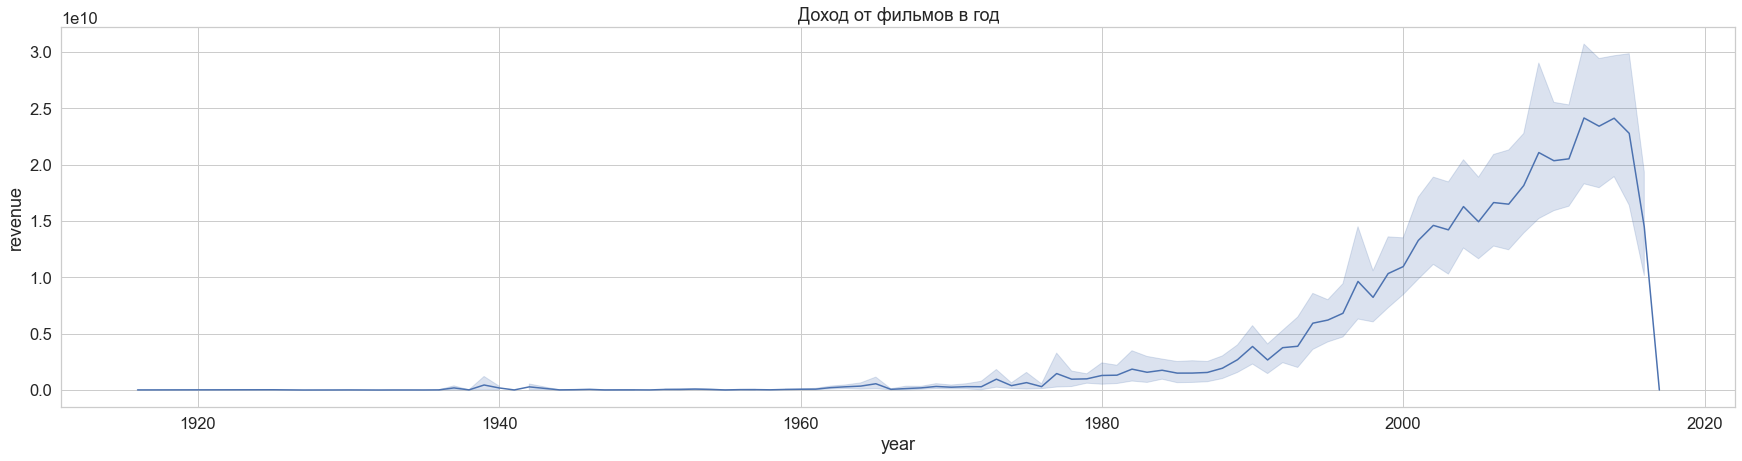

In [17]:
sns.lineplot(data = movie_df, x= 'year', y='revenue', estimator = 'sum')
plt.title('Доход от фильмов в год')

Как мы видим, Касабланка меня подвела. По графику видно, что на протяжении 99 лет интерес к кино растёт, и доходы вместе с ним. Рост не совсем гладкий, есть пиковые значение - вероятнее всего, в эти годы были выпущены самые яркие фильмы с большими сборами. Резкий спад в правой части графика связан с временными ограничениями датастета. Сам рост начался приблизительно в 70х годах, более стабильным он стал начиная с 1980, но похожей на нулевые и далее динамика графика становится начиная с 1990. Выбросим часть данных до 90х, построим график снова и посмотрим, где проходит граница.

Так же для сравнения построим lineplot для бюджета. Растёт ли он одинаково вместе с доходами? И ещё важный момент, связанный с нашей задачей: за счёт чего увеличивается суммарный доход с фильмов за год? Связано это с тем, что раз в год выпускаются крайне успешные фильмы, и доход с таких фильмов растёт каждый год? Или дело в количестве фильмов?

In [18]:
movie_df = movie_df[movie_df['year'] >= 1990] 

<ipython-input-19-fc308b57e0a7>:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(['revenue', 'budget', 'revenue'], labels = ['revenue', 'budget', 'most_profit_movie'])


Text(0.5, 1.0, 'Доход, бюджет и самый прибыльный фильм за всё время')

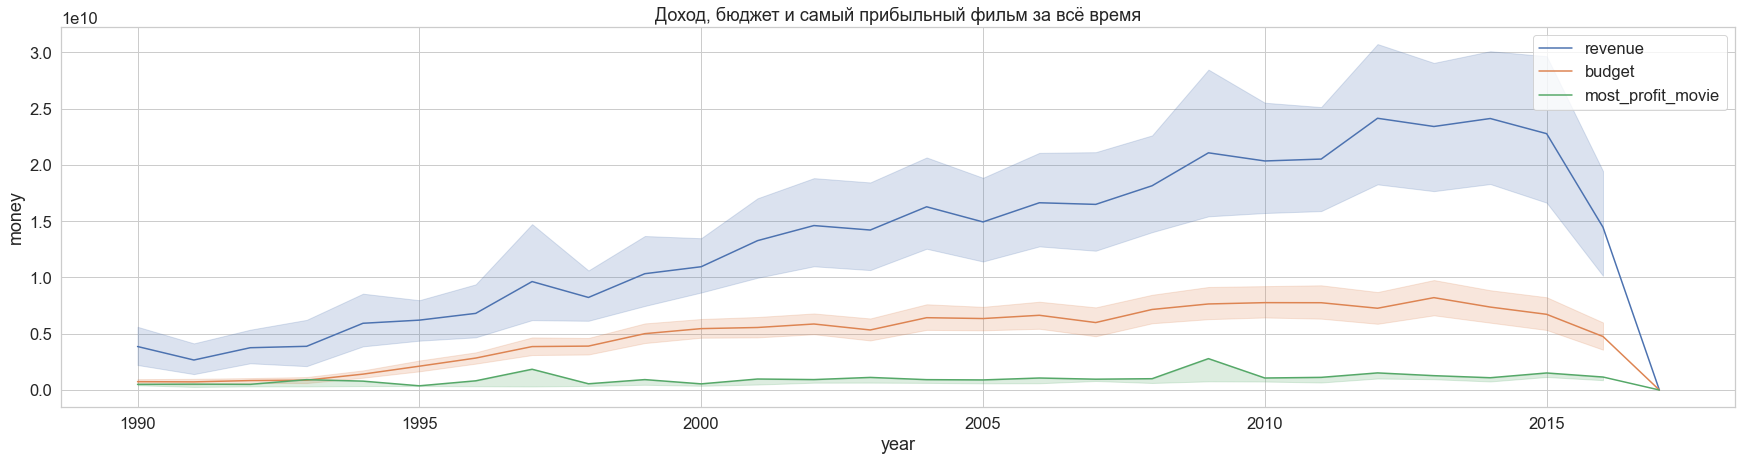

In [19]:
sns.lineplot(data = movie_df, x= 'year', y='revenue', estimator = 'sum')
sns.lineplot(data = movie_df, x= 'year', y='budget', estimator = 'sum')
sns.lineplot(data = movie_df, x= 'year', y='revenue', estimator = 'max')
plt.legend(['revenue', 'budget', 'revenue'], labels = ['revenue', 'budget', 'most_profit_movie'])
plt.ylabel('money')
plt.title('Доход, бюджет и самый прибыльный фильм за всё время')

Какой вывод мы можем сделать? 
Расходы на фильмы тоже растут с годами, но при этом не так активно, как доходы с фильма.
Что интересно - так это, что намного менее интенсивно растут доходы с самых кассовых фильмов, лишь в некоторые года были особо успешные фильмы на фоне остальных. Судя по всему, глобально доходы киноиндустрии увеличиваются за счёт всё большего количества картин. Проверим.

Но перед этим на 2017 год, он выглядит странно, нужно посмотреть, сколько фильмов этого года у нас есть:

In [20]:
movie_df[movie_df['year'] == 2017] 

,budget,genres,id,keywords,original_language,popularity,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,year
4255,0,"[Comedy, Family, Drama]",426469,[],en,0.71087,[],2017-02-03,0,102.0,Growing Up Smith,7.4,7,2017.0


Понятно, его следует убрать

In [21]:
movie_df = movie_df[movie_df['year'] != 2017] 

Text(0.5, 1.0, 'Количество фильмов по годам')

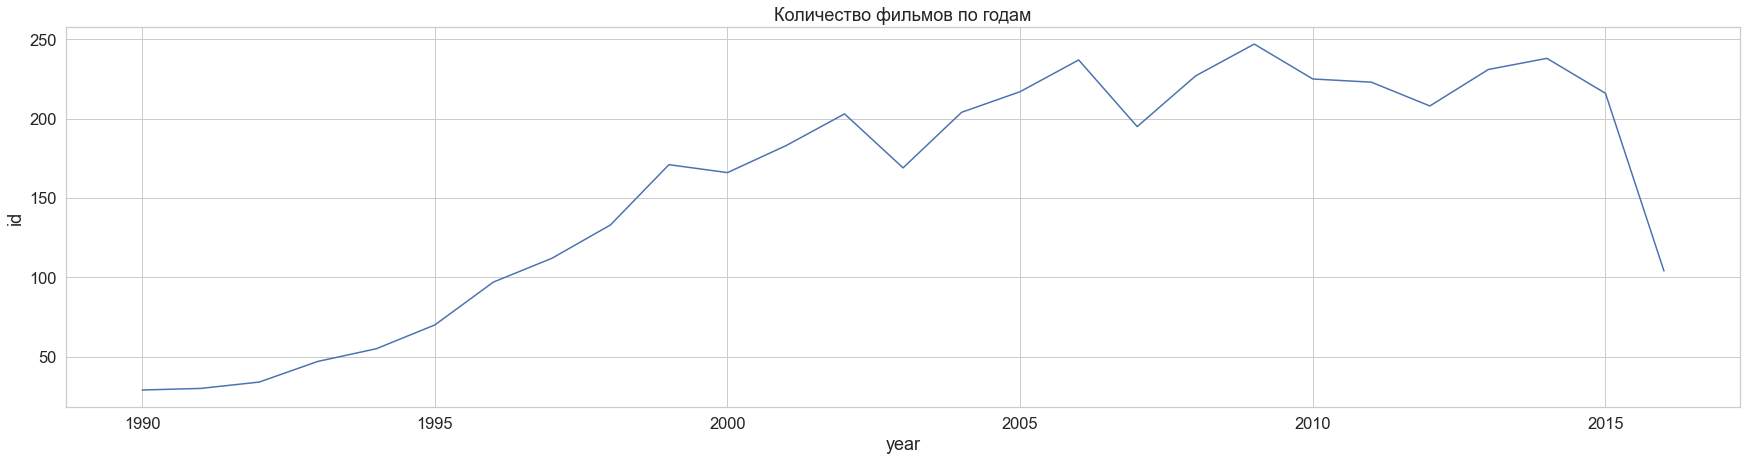

In [22]:
sns.lineplot(data = movie_df.groupby('year', as_index = False).id.count(), x= 'year', y='id' )
plt.title('Количество фильмов по годам')

С 1990 года по 2016 количество снимаемых фильмов выросло с примерно 20 до 200-250!

Text(0.5, 1.0, 'Фильмы с максимальной прибылью по годам')

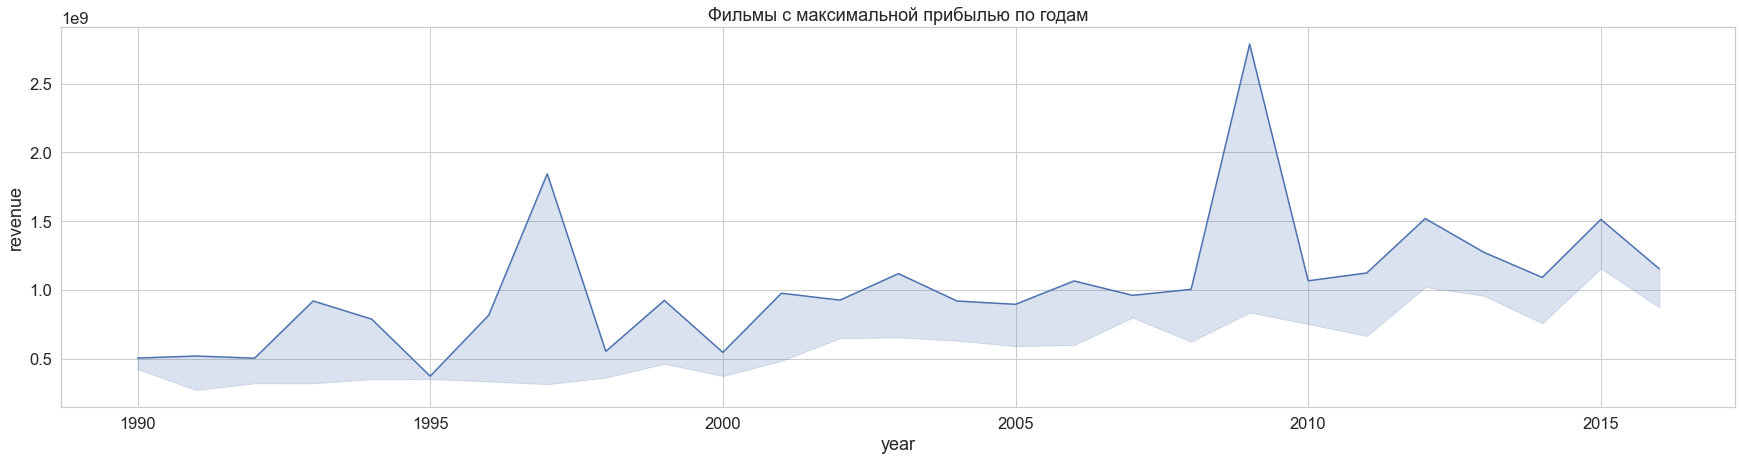

In [23]:
sns.lineplot(data = movie_df, x= 'year', y='revenue', estimator = 'max')
plt.title('Фильмы с максимальной прибылью по годам')

По всем графикам выше **вывод** можно сделать следующий: 1990 по 2016 год прибыль с самых успешных годов растёт медленно, киноиндустрия становится прибыльнее за счёт большего количества фильмов. 
**Для дальнейшей работы следует отбирать успешные фильмы по годам, чтобы вывести формулу успешного фильма**

Далее я переворачиваю дф, чтобы собрать информацию о прибыли по годам

In [24]:
most_profit_movie_df = movie_df.pivot_table(values = 'revenue', columns= 'year', index='title')

In [25]:
most_profit_movie_df.columns = most_profit_movie_df.columns.astype(str)

In [26]:
most_profit_movie_df.rename(columns=lambda x: 'y_' +x[:-2], inplace=True)

In [27]:
most_profit_movie_df.head()

year,y_1990,y_1991,y_1992,y_1993,y_1994,y_1995,y_1996,y_1997,y_1998,y_1999,...,y_2007,y_2008,y_2009,y_2010,y_2011,y_2012,y_2013,y_2014,y_2015,y_2016
title,,,,,,,,,,,,,,,,,,,,,
#Horror,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
(500) Days of Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,60722734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Cloverfield Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108286421.0
10 Days in a Madhouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
10 Things I Hate About You,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53478166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
most_profit_movie_df.describe( percentiles = [.25, .5, .75, 0.8, 0.85, 0.9])

year,y_1990,y_1991,y_1992,y_1993,y_1994,y_1995,y_1996,y_1997,y_1998,y_1999,...,y_2007,y_2008,y_2009,y_2010,y_2011,y_2012,y_2013,y_2014,y_2015,y_2016
count,2.900000e+01,3.000000e+01,3.400000e+01,4.700000e+01,5.500000e+01,7.000000e+01,9.700000e+01,1.120000e+02,1.330000e+02,1.710000e+02,...,1.950000e+02,2.270000e+02,2.470000e+02,2.250000e+02,2.230000e+02,2.080000e+02,2.310000e+02,2.380000e+02,2.160000e+02,1.040000e+02
mean,1.332335e+08,8.880358e+07,1.104972e+08,8.259474e+07,1.077955e+08,8.867347e+07,7.018564e+07,8.602452e+07,6.182783e+07,6.042539e+07,...,8.457242e+07,7.994044e+07,8.531438e+07,9.043811e+07,9.200413e+07,1.160659e+08,1.013485e+08,1.013466e+08,1.054399e+08,1.390496e+08
std,1.585099e+08,1.315520e+08,1.329741e+08,1.651077e+08,1.638397e+08,1.146010e+08,1.243250e+08,1.955256e+08,1.031998e+08,1.235504e+08,...,1.662991e+08,1.469093e+08,2.301852e+08,1.662042e+08,1.606611e+08,2.232479e+08,1.966748e+08,1.882149e+08,2.349938e+08,2.281961e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.615359e+07,2.173312e+05,1.163343e+07,2.365840e+05,2.156585e+05,4.608851e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,4.214500e+04,3.428680e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.320818e+07,3.460503e+07,5.665064e+07,1.593806e+07,2.834147e+07,2.472672e+07,1.649108e+07,1.822048e+07,1.310000e+07,1.003739e+07,...,1.831715e+07,2.021139e+07,1.276420e+07,2.052919e+07,2.612164e+07,2.648864e+07,2.230922e+07,1.271732e+07,6.711290e+06,4.611118e+07
75%,2.019577e+08,9.440760e+07,1.596195e+08,6.370602e+07,1.655007e+08,1.331501e+08,1.028258e+08,1.275271e+08,7.148504e+07,6.099441e+07,...,8.572224e+07,9.316335e+07,6.870909e+07,9.488289e+07,1.260708e+08,1.160974e+08,9.966804e+07,1.081094e+08,1.002835e+08,1.682633e+08
80%,2.418297e+08,1.841405e+08,1.931760e+08,1.331788e+08,2.139460e+08,1.623131e+08,1.274093e+08,1.505172e+08,1.025315e+08,9.087457e+07,...,1.180082e+08,1.250232e+08,9.921241e+07,1.360301e+08,1.486426e+08,1.611085e+08,1.265465e+08,1.583549e+08,1.333465e+08,2.066307e+08
85%,2.579599e+08,2.005394e+08,2.450782e+08,1.964091e+08,2.228869e+08,2.115506e+08,1.501621e+08,1.715554e+08,1.471521e+08,1.183193e+08,...,1.489813e+08,1.637129e+08,1.376573e+08,2.074687e+08,1.762494e+08,2.316250e+08,1.807894e+08,2.188054e+08,1.813827e+08,3.108100e+08
90%,4.319671e+08,2.755541e+08,3.092121e+08,2.610995e+08,3.068591e+08,2.918666e+08,1.685878e+08,2.257413e+08,2.015713e+08,1.778416e+08,...,2.307415e+08,2.166171e+08,2.161042e+08,2.770270e+08,2.276346e+08,3.255092e+08,2.825707e+08,3.127482e+08,2.913722e+08,3.798003e+08


Вот такой вот страшненький он получился. Кажется, фильмы от 0.85 квантиля до 0.9 более однородные по сборам. Отберу фильмы по 0.85 квантилю.

In [29]:
dict_top_movies_per_year = {} #словарь успешных фильмов по годам
top_movies_list = [] # список усешных фильмов
for year in most_profit_movie_df.columns:
    movie_series = most_profit_movie_df[year].dropna()
    q = movie_series.quantile(0.85)
    movie_series = movie_series.where(movie_series > q).dropna()
    top_movies_list.append(movie_series.index.tolist())
    dict_top_movies_per_year[year] =top_movies_list

Так как top_movies_list сейчас представляет из себя список из списков, а удобнее иметь одномерный список, преобразуем его:

In [30]:
flat_top_movies_list = []
for sublist in top_movies_list:
    for item in sublist:
        flat_top_movies_list.append(item)

И что получилось? Сколько фильмов было отобрано?

In [31]:
flat_top_movies_list

['Dances with Wolves',
 'Ghost',
 'Home Alone',
 'Pretty Woman',
 'Total Recall',
 'Hook',
 'JFK',
 'Robin Hood: Prince of Thieves',
 'Terminator 2: Judgment Day',
 'The Silence of the Lambs',
 'Aladdin',
 'Batman Returns',
 'Home Alone 2: Lost in New York',
 'Lethal Weapon 3',
 'The Bodyguard',
 'Cliffhanger',
 'Jurassic Park',
 'Mrs. Doubtfire',
 'Philadelphia',
 "Schindler's List",
 'The Firm',
 'The Fugitive',
 'Dumb and Dumber',
 'Forrest Gump',
 'Four Weddings and a Funeral',
 'Interview with the Vampire',
 'Speed',
 'The Flintstones',
 'The Lion King',
 'The Mask',
 'True Lies',
 'Ace Ventura: When Nature Calls',
 'Apollo 13',
 'Babe',
 'Batman Forever',
 'Casper',
 'Die Hard: With a Vengeance',
 'GoldenEye',
 'Pocahontas',
 'Se7en',
 'Toy Story',
 'Waterworld',
 'A Time to Kill',
 'Broken Arrow',
 'Daylight',
 'Eraser',
 'Independence Day',
 'Jerry Maguire',
 'Mission: Impossible',
 'Phenomenon',
 'Ransom',
 'Scream',
 'Sleepers',
 'Space Jam',
 'The English Patient',
 'The Roc

In [32]:
len(flat_top_movies_list)

651

Прилично! Теперь можно создать дф с успешыми фильмами, и уже приступить к анализу

### Формируем дф с успешными фильмами, его предподготовка к кластеризации

In [33]:
top_movies_full_info_df = movie_df[movie_df.title.isin(flat_top_movies_list)] 

In [34]:
top_movies_full_info_df.head()

,budget,genres,id,keywords,original_language,popularity,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,year
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,150.437577,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,Avatar,7.2,11800,2009.0
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,139.082615,[United States of America],2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007.0
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,107.376788,"[United Kingdom, United States of America]",2015-10-26,880674609,148.0,Spectre,6.3,4466,2015.0
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,112.312950,[United States of America],2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,2012.0
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,43.926995,[United States of America],2012-03-07,284139100,132.0,John Carter,6.1,2124,2012.0


In [35]:
top_movies_full_info_df.shape

(651, 14)

Теперь нужно подготовить дф. Во-первых, отбираем только те колонки, что нужны

In [36]:
top_movies_df = top_movies_full_info_df[['title','budget', 'genres', 'keywords','revenue']]

В некоторых колонках может быть слишком много информации. Например, keywords или genres. А они нужны для кластерного анализа! Посмотрим, какие keywords и genres есть, и какие из них стоит оставить

In [37]:
#функция для подсчета уникальных значений колонки
def get_cnt(column):
    c = Counter(chain(*column)) #превращаю список из списков в единый список для каунтера
    freq = pd.Series(c).sort_values(ascending = False) 
    return freq

In [38]:
keywords_freq = get_cnt(top_movies_df.keywords)

In [39]:
keywords_freq.head(10)

duringcreditsstinger    95
aftercreditsstinger     58
3d                      56
based on novel          44
dystopia                42
superhero               40
sequel                  38
based on comic book     32
marvel comic            28
violence                27
dtype: int64

Сразу вижу, что есть два интересующих меня кейворда - based on novel , superhero. Перехожу к жанрам

In [40]:
main_keywords = ['based on novel' , 'superhero']

In [41]:
genres_freq = get_cnt(top_movies_df.genres)

In [42]:
genres_freq

Action             265
Adventure          261
Comedy             226
Drama              190
Thriller           173
Family             153
Fantasy            132
Science Fiction    124
Animation          104
Romance             97
Crime               82
Mystery             55
Horror              27
History             21
War                 17
Music               13
Western              6
Documentary          1
dtype: int64

In [43]:
genres_freq.shape

(18,)

Вот так выглядят жанры фильмов с большими доходами. Каким-то чудом в этом списке оказался один документальный фильм. Это значит, что всего 1 фильм из 651 причисляется к этому жанру, а это малоинформативно, учитывая то, что у одного фильма несколько жанров. По этой логике я уберу: Documentary, Western, Music, Mystery, War 

In [44]:
main_genres = genres_freq.index[:-4].drop('Mystery')

Из чистого интереса хочется посмотреть, какие есть корреляции среди жанров

In [45]:
genres_cols = pd.get_dummies(top_movies_df.genres.apply(pd.Series).stack()).sum(level=0)

<AxesSubplot:>

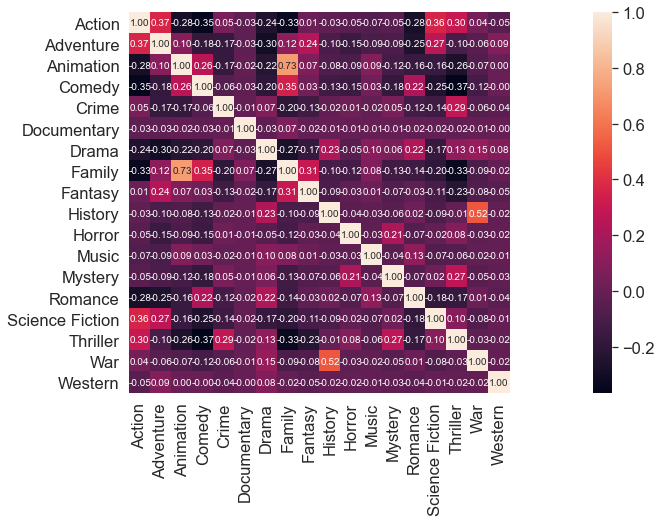

In [46]:
cols = genres_cols.columns
cm = np.corrcoef(genres_cols[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
hm 

Итак, хорошие корреляции есть между Историей и Войной, а также Анимацией и семейным кино. Есть понятные отрицательные корреляции(Триллер и семейное кино). Упомянутые ранее Вестерн и Документальное кино стоят особняком

Теперь номинативные переменные нужно разбить на ряд колонок. Начну с кейвордов

In [47]:
X_keys_df = pd.get_dummies(top_movies_df.keywords.apply(pd.Series).stack()).sum(level=0)[main_keywords]

In [48]:
X_keys_df.head(3)

,based on novel,superhero
0,0,0
1,0,0
2,1,0


In [49]:
X_keys_df.shape[0] == top_movies_df.shape[0]

False

Так, поменялось количество строк, то сильно помешает в дальнейшем. Скорее всего, в датасете есть фильмы, для которых не указаны кейворды. Проверим:

In [50]:
top_movies_df[top_movies_df["keywords"].str.len() == 0]

,title,budget,genres,keywords,revenue
71,The Mummy: Tomb of the Dragon Emperor,145000000,"[Adventure, Action, Fantasy]",[],401128639
323,Sex and the City 2,100000000,"[Comedy, Drama, Romance]",[],288347692
436,Grown Ups 2,80000000,[Comedy],[],246984278


Всего три фильма, которые стоит убрать, чтобы провести кластеризацию

In [51]:
#функция, возвращающая датасет без пустых значений колонок типа object
def drop_empty(df):
    for column in df.columns:
        if df[column].dtype == 'O':
            df = df[~(df[column].str.len() == 0)]
    return df

In [52]:
top_movies_df = drop_empty(top_movies_df)

In [53]:
X_keys_df = pd.get_dummies(top_movies_df.keywords.apply(pd.Series).stack()).sum(level=0)[main_keywords]

In [54]:
X_keys_df.head(3)

,based on novel,superhero
0,0,0
1,0,0
2,1,0


In [55]:
X_keys_df.shape[0] == top_movies_df.shape[0]

True

То же самое для жанров:

In [56]:
X_genres_df = pd.get_dummies(top_movies_df.genres.apply(pd.Series).stack()).sum(level=0)[main_genres]

In [57]:
X_genres_df.head(3)

,Action,Adventure,Comedy,Drama,Thriller,Family,Fantasy,Science Fiction,Animation,Romance,Crime,Horror,History
0,1,1,0,0,0,0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,1,0,0


In [58]:
X_genres_df.shape[0] == top_movies_df.shape[0]

True

Мерджим в дф для кластеризации:

In [59]:
X = pd.merge(X_keys_df, X_genres_df, left_index= True, right_index= True)

In [60]:
X 

,based on novel,superhero,Action,Adventure,Comedy,Drama,Thriller,Family,Fantasy,Science Fiction,Animation,Romance,Crime,Horror,History
0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0
1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
4,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3824,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3861,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4496,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4577,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Кластеризация

### k-means

C:\Users\cbata\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


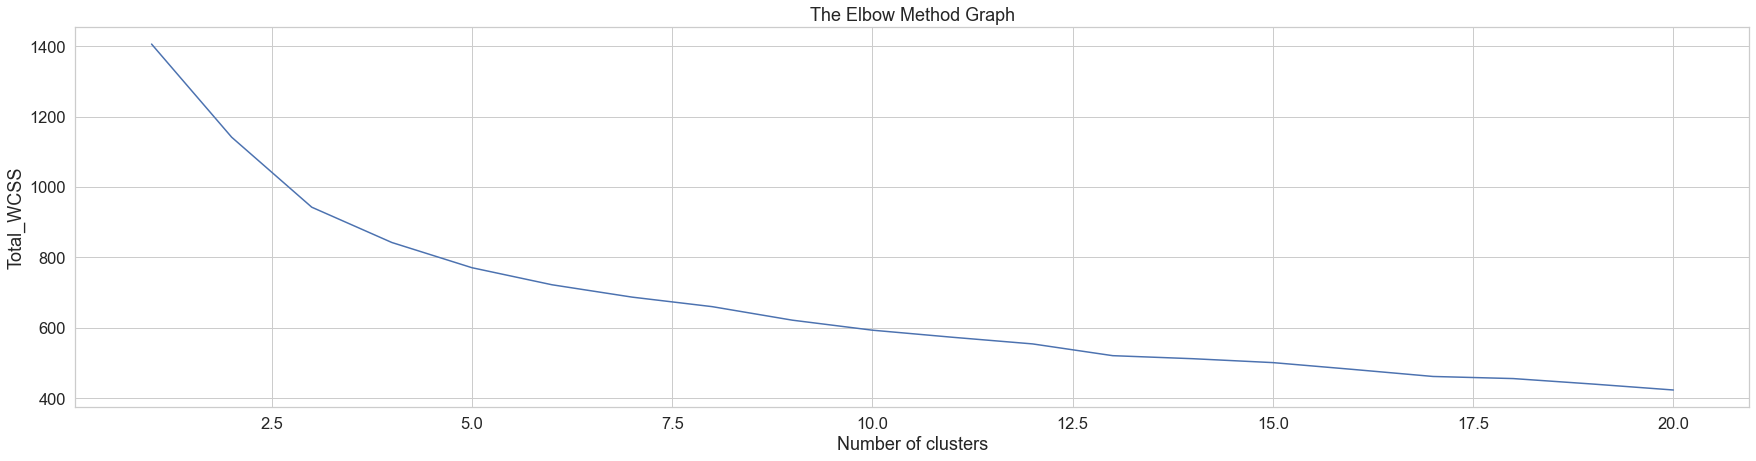

In [61]:
total_wcss=[] #список для значений суммы квадратов для каждого числа кластеров
n_clusters = 20 #задаём количество кластеров, обычно берут 10

for i in range(1,n_clusters+1): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(X)
    total_wcss.append(kmeans.inertia_)

plt.plot(range(1,n_clusters+1),total_wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Total_WCSS')
plt.show()

По такому графику сложно что-то сказать об оптимальном количестве кластеров... Видимо, k-means не подходит в этой ситуации.

### Иерархический кластерный анализ 

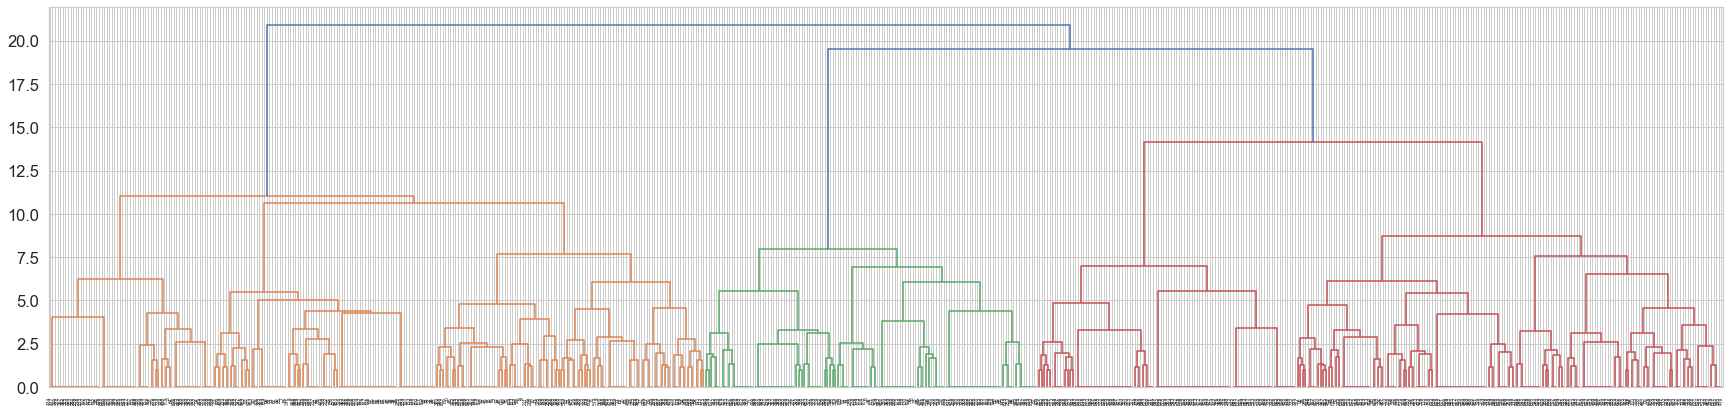

In [62]:
clusters = shc.linkage(X, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

Результаты кластерного анализа выглядят более понятными: можно выделить от 3 до 6 наиболее крупных кластеров. Так как данных достаточно много, имеет смысл начать с просмотра результатов при 6 кластерах.

In [63]:
#функция, позволяющая получить готовый дф с кластерами
def get_clustered_df(X, n):
    clustering_model = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')
    clusters_values = clustering_model.fit(X)
    clusters_values.labels_
    top_clustered =top_movies_df.copy()
    top_clustered = top_clustered.merge(X, left_index = True, right_index = True)
    top_clustered["clusters"] = clusters_values.labels_
    return(top_clustered)

In [64]:
top_clustered = get_clustered_df(X,6)

In [65]:
top_clustered.head(3)

,title,budget,genres,keywords,revenue,based on novel,superhero,Action,Adventure,Comedy,...,Thriller,Family,Fantasy,Science Fiction,Animation,Romance,Crime,Horror,History,clusters
0,Avatar,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",2787965087,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,1
1,Pirates of the Caribbean: At World's End,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",961000000,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
2,Spectre,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",880674609,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1


Сколько фильмов в каждом кластере?

In [66]:
top_clustered.clusters.value_counts()

0    165
2    129
1    104
3    100
5     86
4     64
Name: clusters, dtype: int64

Скажу сразу, что буду проверять кластеры с помощью гугла: охотно ли он выдаёт результаты по получившемуся кластеру? А ещё по уровню средней можно выделить **ключевые жанры** и **элементы**. Можно будет смело рассказывать голливудским режиссёрам, чего должно быть больше, а чего меньше, чтобы фильм принёс хорошие деньги. Но что отнести к ключевому жанру, а что к элементу? Я посчитала, что можно включить в ключевой жанр максимальный по среднему в кластере, и уже относительно него рассчитывать границы. То, что будет в пределах половины от него, будет также считаться ключевым. То, что выйдет за половину, но будет в пределах 3/4 от жанра, будет считаться элементом. Например, для кластера 0 ключевоые жанры будут в пределах от 0.86 до 0.43, элементы - от 0.43 до 0.22

In [67]:
#функция для расчёта границ жанров в кластере
def get_genre_borders(df):
    df = df.iloc[:,5:].groupby('clusters').mean()
    dict_genre_borders= {}
    for cluster in df.index:
        max= df.query('clusters == @cluster').max(axis=1).round(2).values[0] #тут не сработало обращение через [0] без values
        half = (df.query('clusters == @cluster').max(axis=1) / 2).round(2).values[0]
        quarter =(df.query('clusters == @cluster').max(axis=1) / 4).round(2).values[0]
        dict_genre_borders[str(cluster)] = [max, half, quarter]  
    return dict_genre_borders

Наконец, посмотрим на хитмап со средними по кластерам и соотнесем жанры и кластеры

In [68]:
get_genre_borders(top_clustered)

{'0': [0.86, 0.43, 0.22],
 '1': [0.88, 0.44, 0.22],
 '2': [0.97, 0.48, 0.24],
 '3': [0.99, 0.5, 0.25],
 '4': [0.98, 0.49, 0.25],
 '5': [0.99, 0.49, 0.25]}

In [69]:
#функция для hm по жанрам
def get_clustered_hm(top_clustered):
    clusters_meaning = top_clustered.iloc[:,5:].groupby('clusters').mean()
    fig = sns.heatmap(clusters_meaning,  annot=True, square=True, fmt='.2f')
    return fig

<AxesSubplot:ylabel='clusters'>

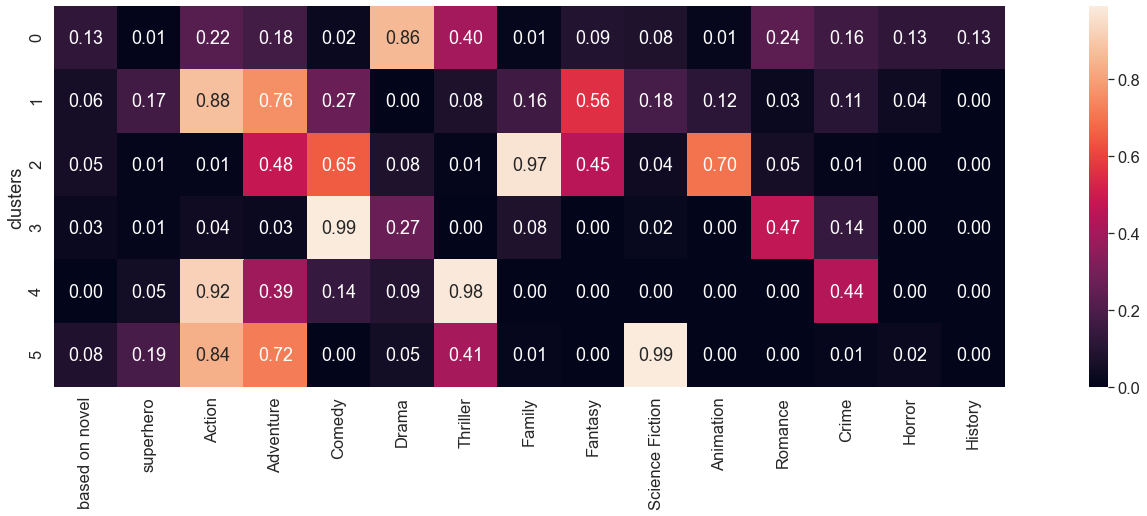

In [70]:
get_clustered_hm(top_clustered)

- Нулевой кластер.

Ключевые жанры: Драма. Элементы: триллер, романтика, экшн.  Криминальное чтиво, Молчание ягнят, Бойцовский клуб

- Первый кластер.

Ключевые жанры: экшн-приключение-фэнтези. Элементы: комедия.  Властелин колец, Гарри Поттер, Фантастические твари

- Второй кластер.

Ключевые жанры: семейное кино-анимация-комедия-приключение. Элементы: фентези. Холодное сердце, История игрушек, Моана

- Третий кластер.

Ключевые жанры: Комедия. Элементы: романтика, драма. Хорошо, этих фильмов миллионы. Здесь мне сначала захотелось написать про Сумерки, но потом я вспомнила, что это официально не комедия... Так что Вечное сияние чистого разума, Реальная любовь, Красотка

- Четвёртый кластер. 

Ключевые жанры: триллер-экшн. Элементы: криминал-приключение. Джон Уик, фильмы про Бонда, фильмы про Бэтмена Нолана

- Пятый кластер. 

Ключевые жанры: сайнсфикшн-экшн-приключение. Элементы: триллер. Наверное, самый популярный тип фильмов в последние годы(пока я пишу это, идёт 2022). Мстители, Человек-паук

Тем не менее, есть явные проблемы: например, жанр ужасов и исторические фильмы слились с какими-то кластером, хотя явно должны занимать свои собственные кластеры. Судя по всему, ужасы перешли в нулевой кластер (драма), а куда делось историческое кино... Так же можно предположить семейное кино тоже может разбиться на что-то ещё.

Посмотрим, какие фильмы находятся в нулевом кластере:

In [71]:
titles_clusters_df = pd.DataFrame(top_clustered.groupby('clusters')['title'].apply(list)).reset_index()

In [92]:
titles_clusters_df

,clusters,title
0,0,"[King Kong, Titanic, World War Z, The Great Ga..."
1,1,"[Avatar, Pirates of the Caribbean: At World's ..."
2,2,"[Tangled, Harry Potter and the Half-Blood Prin..."
3,3,"[Fun with Dick and Jane, Gulliver's Travels, T..."
4,4,"[The Dark Knight Rises, Skyfall, Rush Hour 3, ..."
5,5,"[John Carter, Avengers: Age of Ultron, The Ave..."


Кластеры их их фильмы. Первые фильмы вполне соответсвуют кластерам. Попробуем подробнее посмотреть нулевой:

In [73]:
titles_clusters_df.query('clusters == 0').explode('title')

,clusters,title
0,0,King Kong
0,0,Titanic
0,0,World War Z
0,0,The Great Gatsby
0,0,A Christmas Carol
...,...,...
0,0,Annabelle
0,0,Saw II
0,0,Paranormal Activity 3
0,0,The Blair Witch Project


Видно, что в кластере есть фильмы ужасов. Тут же уже виден Гэтсби, который относится и к историческому жанру.

Стоит попробовать кластеризовать ещё раз. Судя по графику, можно попробовать разбиение на 9 кластеров может дать более интересный результат

In [74]:
top_clustered_v2 = get_clustered_df(X,9)

In [75]:
get_genre_borders(top_clustered_v2)

{'0': [0.76, 0.38, 0.19],
 '1': [0.99, 0.5, 0.25],
 '2': [0.95, 0.48, 0.24],
 '3': [1.0, 0.5, 0.25],
 '4': [0.98, 0.49, 0.25],
 '5': [0.99, 0.49, 0.25],
 '6': [0.8, 0.4, 0.2],
 '7': [0.98, 0.49, 0.25],
 '8': [1.0, 0.5, 0.25]}

<AxesSubplot:ylabel='clusters'>

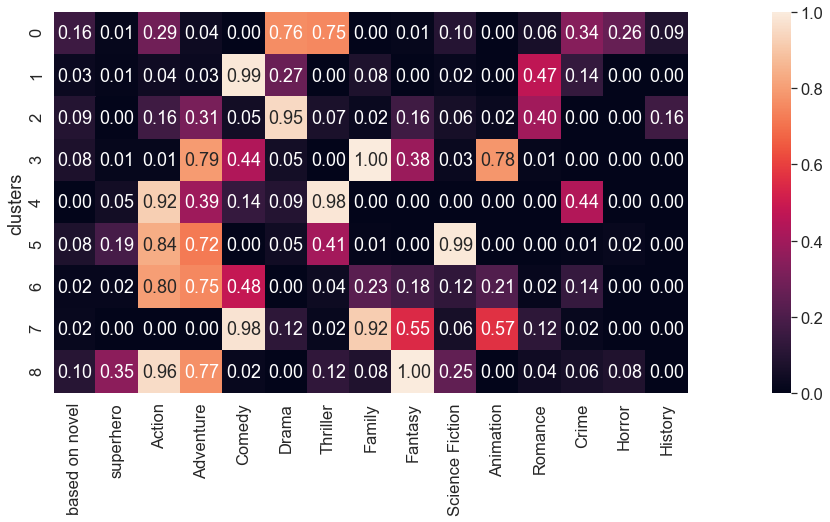

In [76]:
get_clustered_hm(top_clustered_v2)

Результат не так понятен и прост, как хотелось бы. Нулевой кластер стал Драма-Трилер, романтическая комедия осталась на месте, выделилась драма с элементами романтики. Семейное кино-анимация разбилась на два кластера с разными пропорциями, но очень похожие. Немного изменился триллер-экшн-криминал, остался как есть сай-фай. История и ужасы не стали отдельными кластерами. В кластер с фентези добавились супергерои.
Такая кластеризация кажется менее понятной, чем предыдущая.

#### Вывод по кластеризации
K-means не сработал, **иерархический кластерный анализ дал несколько вариантов, было решено взять 6 кластеров, так как это легче интерпретируется**.

### Сравнение бюджетов и прибыли для кластеров, жанров по целому датасету и по дф с успешными фильмами

Вернёмся к top_clustered. Хочется посмотреть средние бюджеты и прибыль для кластеров! Но для начала переименуем их

In [86]:
top_clustered.clusters = np.where(top_clustered.clusters == '0', 'Drama', top_clustered.clusters)
top_clustered.clusters = np.where(top_clustered.clusters == '1', 'Act-Adv-Fantasy', top_clustered.clusters)
top_clustered.clusters = np.where(top_clustered.clusters == '2', 'Family-Anim-Com-Adv', top_clustered.clusters)
top_clustered.clusters = np.where(top_clustered.clusters == '3', 'Com', top_clustered.clusters)
top_clustered.clusters = np.where(top_clustered.clusters == '4', 'Thr-Act', top_clustered.clusters)
top_clustered.clusters = np.where(top_clustered.clusters == '5', 'SciFi-Act-Adv', top_clustered.clusters)

In [87]:
top_clustered.clusters.unique()

array(['Act-Adv-Fantasy', 'Thr-Act', 'SciFi-Act-Adv',
       'Family-Anim-Com-Adv', 'Drama', 'Com'], dtype=object)

Распределение прибыли и бюджета по кластерам:

Text(0.5, 1.0, 'AVG budget/revenue by cluster')

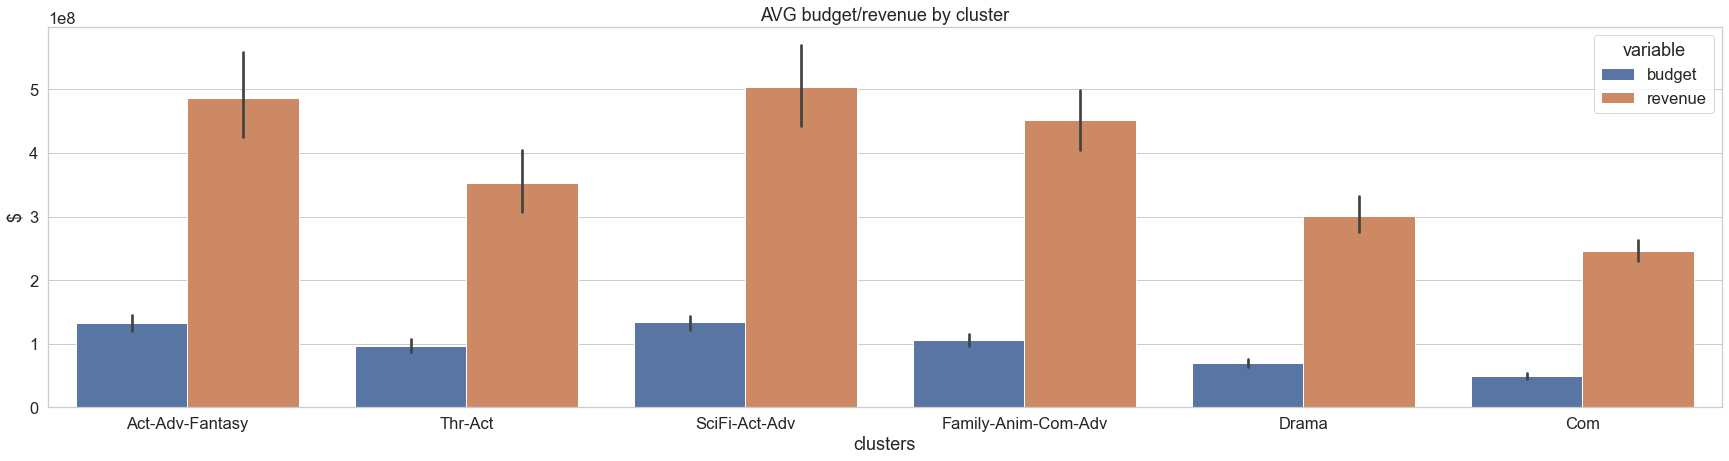

In [88]:
sns.barplot(data = top_clustered[['budget','revenue','clusters']].melt(id_vars='clusters',
    value_vars=['budget','revenue'], value_name='$'), x = 'clusters', y = '$', hue = 'variable')
plt.title('AVG budget/revenue by cluster')

In [89]:
top_clustered[['budget', 'revenue', 'clusters']] \
    .groupby('clusters', as_index = False).mean().sort_values(by = 'revenue', ascending = False)

,clusters,budget,revenue
4,SciFi-Act-Adv,1.333372e+08,5.041055e+08
0,Act-Adv-Fantasy,1.326231e+08,4.864731e+08
3,Family-Anim-Com-Adv,1.059394e+08,4.524809e+08
5,Thr-Act,9.703125e+07,3.522328e+08
2,Drama,6.950955e+07,3.008803e+08
1,Com,4.853200e+07,2.463382e+08


Чем больше бюджет, тем больше прибыль.
Самым прибыльным кластером можно считать экшоновый сайфай, следом идёт приключенческий фентези экшн, за ними семейный мультик. Между их средними нет статистически значимых различий для прибыли. Средний бюджет на мультфильм статистически значимо меньше, чем на два первых кластера.

Далее по убыванию прибыли идут: экшоновый триллер, драма и комедия. Средняя прибыль комедии статистически значимо меньше, чем экшонового триллера и драмы. Бюджеты по ним статистически значимо различаются, идут в том же порядке, что и прибыль.

Каково соотношение средних бюджета к прибыли в кластерах?

In [81]:
top_clustered[['budget','revenue','clusters']].groupby('clusters').mean().budget / top_clustered[['budget','revenue','clusters']].groupby('clusters').mean().revenue

clusters
0                      0.231021
Act-Adv-Fantasy        0.272622
Com                    0.197014
Family-Anim-Com-Adv    0.234130
SciFi-Act-Adv          0.264503
Thr-Act                0.275475
dtype: float64

### Так что мы в итоге советуем голливуду по результатам кластеризации? 

Больше всего прибыли можно получить с сайфай экшна с элементами трилера, приключенческого экш-фентези с элементами комедии, семейного комедийного и приключенческого мультика с элементами фентези. При этом на мультик можно потратить меньше денег, чем на первые два. 
Триллер экшн с элементами криминала и приключения обойдётся во столько же, сколько и семейный мультик, но принесёт меньше денег. Драма с элементами романтики, трилера и экшна может выйти примерно такой же по прибыли, но обойдётся в меньшую стоимость. Комедия с элементами романтики и драмы обойдётся ещё дешевле.

А ещё комедия с элементами романтики даст больше прибыли по отношению к затратам(примерно 19/100, чем все остальные кластеры от 23/100 до 27/100)

Можно посмотреть, насколько уровень прибыли в кластерах согласуется с обычным разбиением по жанрам. Среднюю прибыль по жанрам можно посмотреть как и для успешных фильмов, так и для всех, что есть в исходном дф

Text(0.5, 1.0, 'AVG budget/revenue by top genres')

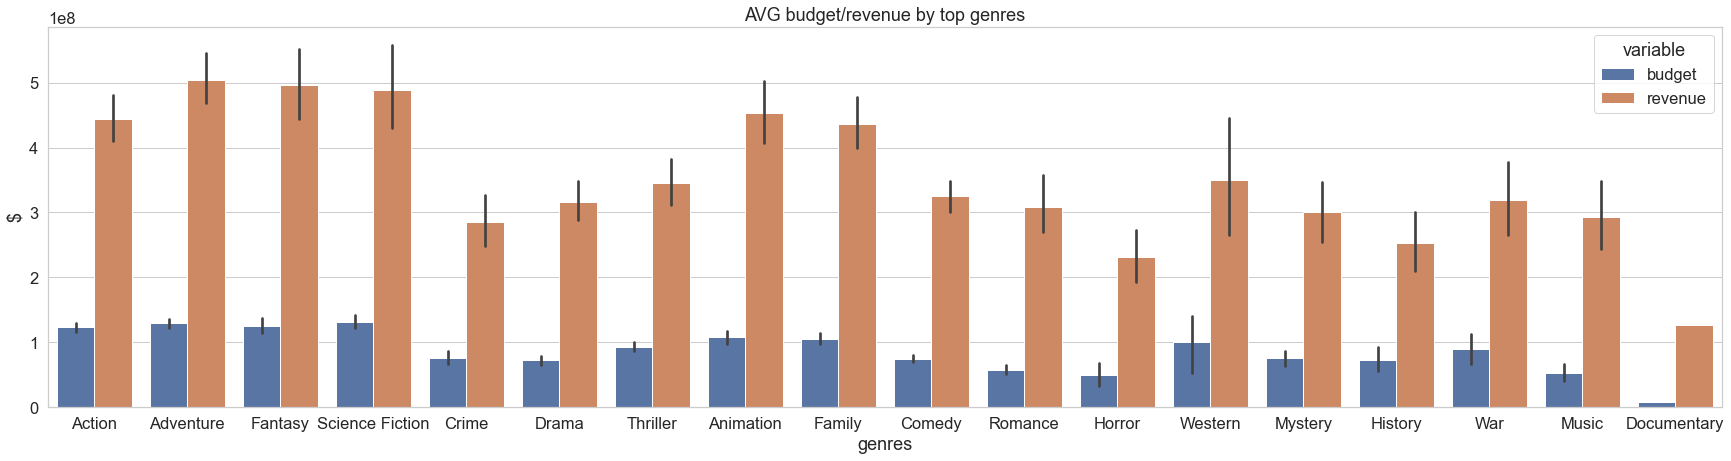

In [82]:
sns.barplot(data = top_clustered.explode('genres').melt(id_vars='genres',
    value_vars=['budget','revenue'], value_name='$'), x = 'genres', y = '$', hue = 'variable')
plt.title('AVG budget/revenue by top genres')

In [83]:
top_clustered[['budget','revenue','genres']].explode('genres')\
    .groupby('genres', as_index = False).mean().sort_values(by = 'revenue', ascending = False)

,genres,budget,revenue
1,Adventure,1.293038e+08,5.048754e+08
8,Fantasy,1.254160e+08,4.966201e+08
14,Science Fiction,1.320323e+08,4.889192e+08
2,Animation,1.077902e+08,4.533863e+08
0,Action,1.232568e+08,4.441633e+08
7,Family,1.057920e+08,4.361043e+08
17,Western,1.000000e+08,3.504390e+08
15,Thriller,9.347110e+07,3.450382e+08
3,Comedy,7.485134e+07,3.249957e+08
16,War,8.940000e+07,3.199320e+08


**Вывод**

Самыми прибыльными жанрами можно считать: приключение, фентези, сайнс фикшн, анимацию, экш и семейное кино. Прибыль по ним значимо не различается, но бюджеты у анимации и семейного кино меньше, чем у остальных.

Text(0.5, 1.0, 'AVG budget/revenue by genres')

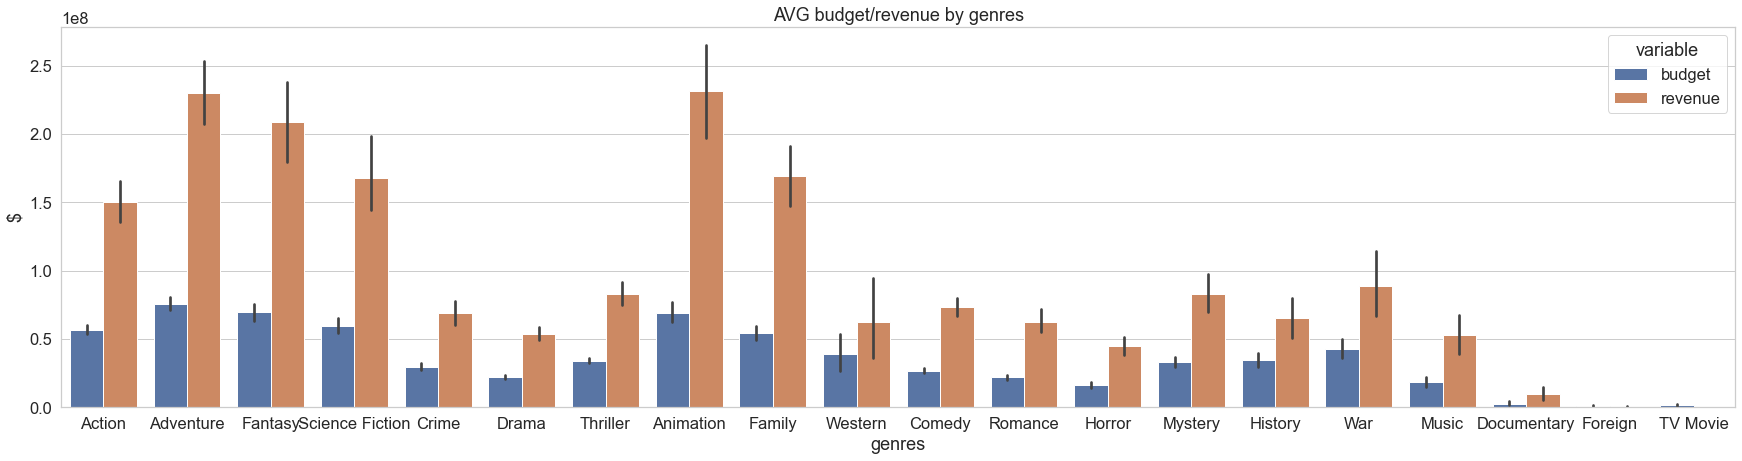

In [84]:
sns.barplot(data = movie_df.explode('genres').melt(id_vars='genres',
    value_vars=['budget','revenue'], value_name='$'), x = 'genres', y = '$', hue = 'variable')
plt.title('AVG budget/revenue by genres')

In [85]:
movie_df[['budget','revenue','genres']].explode('genres')\
    .groupby('genres', as_index = False).mean().sort_values(by = 'revenue', ascending = False)

,genres,budget,revenue
2,Animation,6.895198e+07,2.315874e+08
1,Adventure,7.586261e+07,2.298328e+08
8,Fantasy,6.965183e+07,2.089537e+08
7,Family,5.437320e+07,1.693695e+08
15,Science Fiction,5.955479e+07,1.679379e+08
0,Action,5.667147e+07,1.499849e+08
18,War,4.279034e+07,8.851191e+07
13,Mystery,3.273689e+07,8.318058e+07
17,Thriller,3.413310e+07,8.305487e+07
3,Comedy,2.673055e+07,7.343632e+07


**Вывод**

Самыми прибыльными жанрами среди успешных фильмов можно считать: анимацию, приключение, фентези. Средние бюджеты по ним статистически значимо не различаются.